In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.5)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV

In [3]:
#資料來源:https://www.kaggle.com/c/titanic
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info() #Age、Cabin、Embarked有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsson, Mr. Nils Johan Goransson",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
df_test.info() #Age、Fare、Cabin有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_data = df_train.append(df_test)
df_data.reset_index(inplace=True, drop=True)
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
def featureCorr(datasets,dropData):
    f, ax = plt.subplots(figsize=(10,6))
    train_corr = datasets.drop(dropData,axis=1).corr()
    sns.heatmap(train_corr, ax=ax, vmax=.9, square=True, annot=True)
    ax.set_xticklabels(train_corr.index, rotation=90)
    ax.set_yticklabels(train_corr.columns[::1], rotation=360)
    ax.set_title('Feature Correlation', fontsize=20)

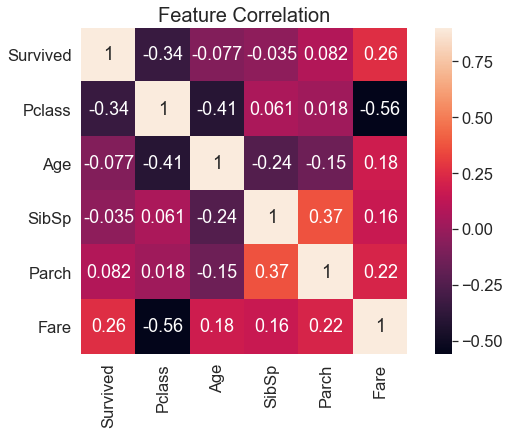

In [12]:
featureCorr(df_data,'PassengerId')

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


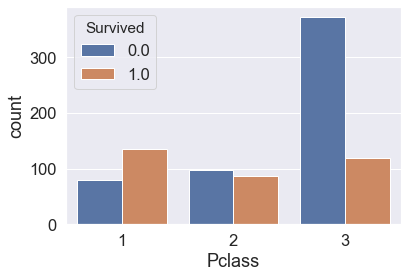

In [13]:
sns.countplot(df_data['Pclass'], hue=df_data['Survived'])
df_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().round(3)

,Sex,Survived
0,female,0.742
1,male,0.189


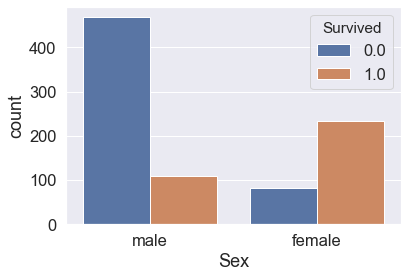

In [14]:
sns.countplot(df_data['Sex'], hue=df_data['Survived'])
df_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().round(3)

In [15]:
#轉換性別文字為數字
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

In [16]:
#再把訓練與測試集分開
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

print(len(df_train))
print(len(df_test))

891
418


In [17]:
#定義預測與預測結果資料集
Y = df_train['Survived']
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [18]:
#基準模型  
Base = ['Sex_Code','Pclass']
Base_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.73064


In [19]:
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
Base_pred = Base_Model.predict(X_Submit[Base])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],"Survived":Base_pred.astype(int)})
submit.to_csv("submit_Base.csv",index=False)

In [20]:
#Age處理

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Sex_Code     1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 128.0+ KB


Sex,female,male,All
Has_Age,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


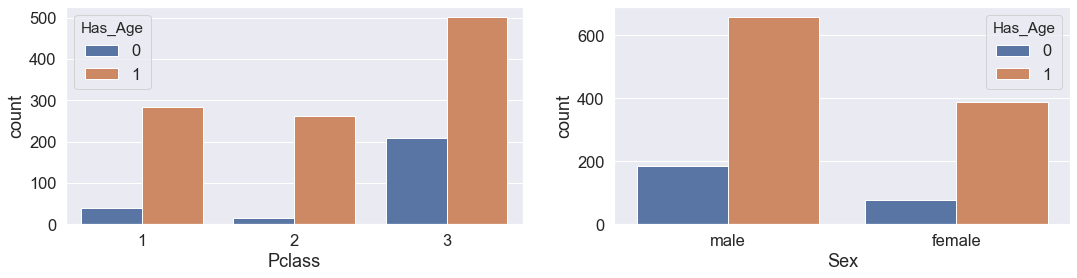

In [22]:
#觀察缺失值分佈  
df_data['Has_Age'] = df_data['Age'].isnull().map(lambda x : 0 if x == True else 1)
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(18)
ax1 = sns.countplot(df_data['Pclass'],hue=df_data['Has_Age'],ax=ax1)
ax2 = sns.countplot(df_data['Sex'],hue=df_data['Has_Age'],ax=ax2)
pd.crosstab(df_data['Has_Age'],df_data['Sex'],margins=True)

Text(0.5, 1.0, 'Age vs Survived in Pclass = 1 and 2')

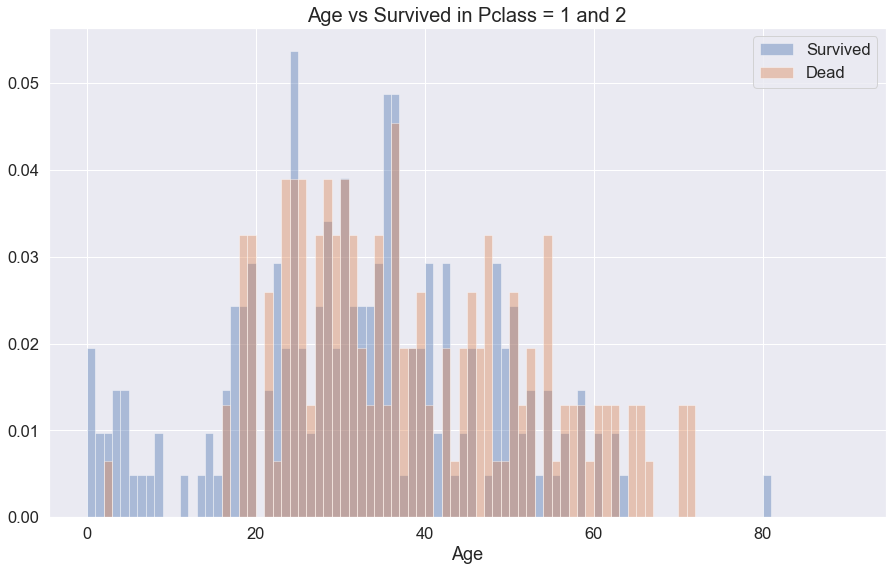

In [23]:
Mask_Has_Age_P12_Survived = ((df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 1))
Mask_Has_Age_P12_Dead = ((df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 0))

fig, ax = plt.subplots(figsize = (15,9))
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Survived, 'Age'],kde=False,bins=[x for x in range(91)],\
                  norm_hist=True,label='Survived')
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Dead, 'Age'],kde=False,bins=[x for x in range(91)],norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and 2',fontsize = 20)

Text(0.5, 1.0, 'Age vs Survived in Pclass = 1 and 2')

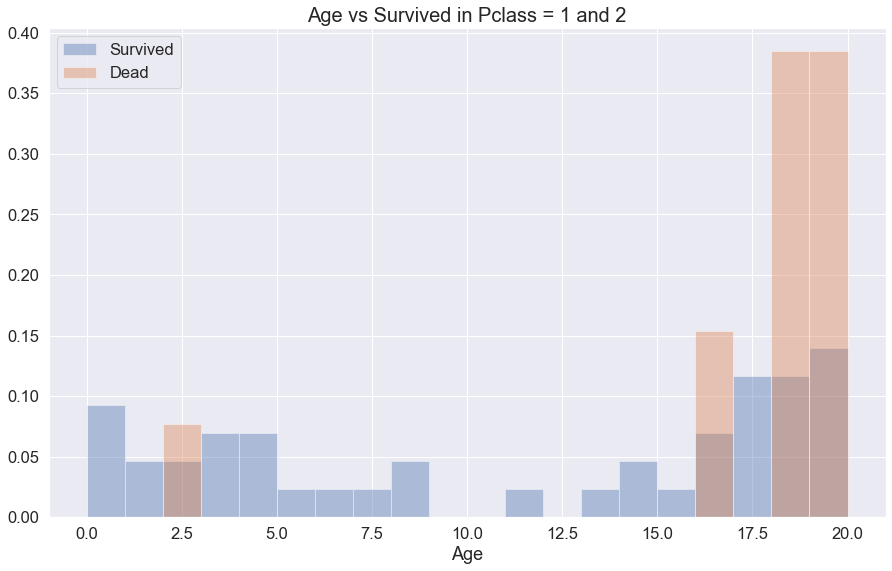

In [24]:
Mask_Has_Age_P12_Survived = ((df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 1) & (df_data.Age<=20))
Mask_Has_Age_P12_Dead = ((df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 0) & (df_data.Age<=20))

fig, ax = plt.subplots(figsize = (15,9))
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Survived, 'Age'],kde=False,bins=[x for x in range(21)],\
                  norm_hist=True,label='Survived')
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Dead, 'Age'],kde=False,bins=[x for x in range(21)],norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and 2',fontsize = 20)

In [25]:
#用稱謂群體的中位數來填補年齡
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Title'] = df_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Title'] = df_data['Title'].replace(['Lady'],'Mrs')
df_data['Title'] = df_data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = df_data.groupby('Title')['Age'].median()
Ti

Title
0    29.0
1    47.0
2     4.0
3    22.0
4    36.0
Name: Age, dtype: float64

In [33]:
Ti_pred = df_data.groupby('Title')['Age'].median().values
df_data['Ti_Age'] = df_data['Age']

for i in range(0,5):
    df_data.loc[(df_data.Age.isnull()) & (df_data.Title == i),'Ti_Age'] = Ti_pred[i]

df_data['Ti_Age'] = df_data['Ti_Age'].astype('int')
df_data['Ti_Minor'] = ((df_data['Ti_Age']) < 15.0) * 1

In [34]:
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [35]:
#kaggle:0.77511
minor = ['Sex_Code','Pclass','Ti_Minor']
minor_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20,oob_score=True)
minor_Model.fit(X[minor], Y)
print('minor oob score :%.5f' %(minor_Model.oob_score_))

minor oob score :0.75421


In [36]:
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
minor_pred = minor_Model.predict(X_Submit[minor])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],"Survived":minor_pred.astype(int)})
submit.to_csv("submit_minor.csv",index=False)

In [37]:
#Fare處理

Fare        
Survived    0.0     1.0
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

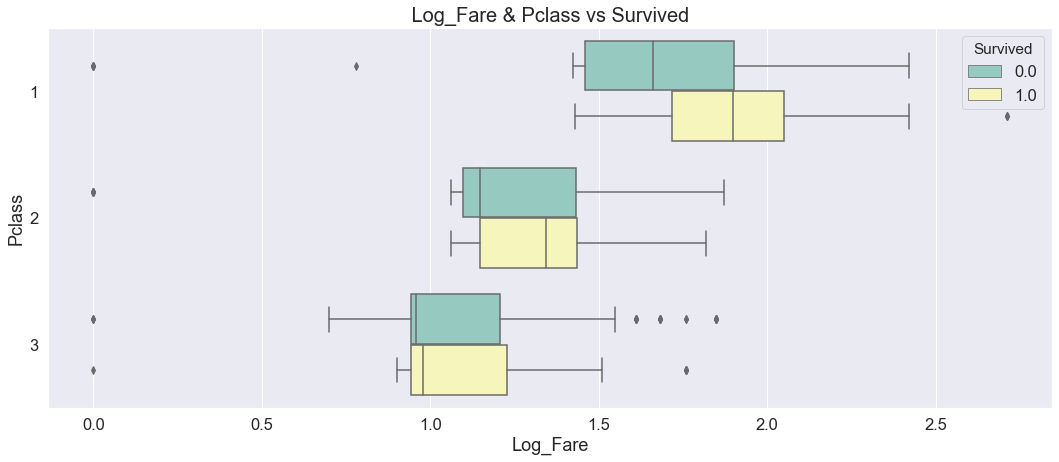

In [38]:
fig, ax = plt.subplots(figsize = (18,7))
df_data['Log_Fare'] = (df_data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=df_data, orient='h'
                ,ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(df_data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median').round(3)

In [39]:
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Pclass,1,2,3
FareBin4,,,
0,8,6,323
1,0,128,193
2,77,104,147
3,238,39,46
Pclass,1,2,3
FareBin5,,,
0,8,6,261
1,0,36,218
2,0,124,132


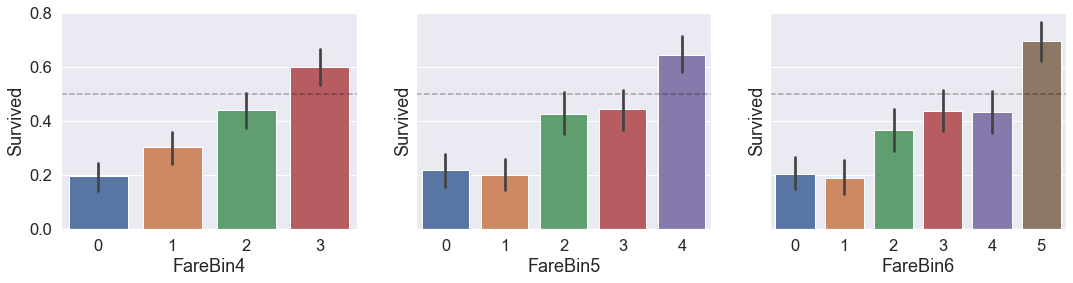

In [40]:
#只有一個缺失，填中位數就可以了，還要適當切分票價避免過擬合
# Filling missing values
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].median())

# 用pandas qcut以累積百分比來切分
df_data['FareBin_4'] = pd.qcut(df_data['Fare'], 4)
df_data['FareBin_5'] = pd.qcut(df_data['Fare'], 5)
df_data['FareBin_6'] = pd.qcut(df_data['Fare'], 6)

label = LabelEncoder()
df_data['FareBin4'] = label.fit_transform(df_data['FareBin_4'])
df_data['FareBin5'] = label.fit_transform(df_data['FareBin_5'])
df_data['FareBin6'] = label.fit_transform(df_data['FareBin_6'])

df_4 = pd.crosstab(df_data['FareBin4'],df_data['Pclass'])
df_5 = pd.crosstab(df_data['FareBin5'],df_data['Pclass'])
df_6 = pd.crosstab(df_data['FareBin6'],df_data['Pclass'])

display_side_by_side(df_4,df_5,df_6)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3,sharey=True)
fig.set_figwidth(18)
for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5,linestyle='dashed', c='black',alpha = .3)
g1 = sns.catplot(x='FareBin4', y="Survived", data=df_data,kind='bar',ax=ax1)
g2 = sns.catplot(x='FareBin5', y="Survived", data=df_data,kind='bar',ax=ax2)
g3 = sns.catplot(x='FareBin6', y="Survived", data=df_data,kind='bar',ax=ax3)
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)

In [41]:
# Fare切割完再分一次訓練與測試集
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']
# show columns
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_Code', 'Has_Age', 'Title', 'Ti_Age', 'Ti_ch',
       'Ti_Ch', 'Ti_Minor', 'Log_Fare', 'FareBin_4', 'FareBin_5', 'FareBin_6',
       'FareBin4', 'FareBin5', 'FareBin6'],
      dtype='object')

In [42]:
#RFE選擇特徵，跟Chi square、或是information gain比可以考慮到特徵之間的交互作用
compare = ['Sex_Code','Pclass','Ti_Minor','FareBin4','FareBin5','FareBin6']
selector = RFECV(RandomForestClassifier(n_estimators=250,min_samples_split=20),cv=10,n_jobs=-1)
selector.fit(X[compare], Y)
print(selector.support_)
print(selector.ranking_)
print(selector.grid_scores_*100)
#看來切6份比較好，但還要驗證

[ True  True  True  True  True  True]
[1 1 1 1 1 1]
[78.66981614 77.33398593 79.56996936 79.35529452 80.81230848 81.71371014]


In [43]:
score_b4,score_b5, score_b6 = [], [], []
seeds = 10
for i in range(seeds):
    diff_cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=i)
    selector = RFECV(RandomForestClassifier(random_state=i,n_estimators=250,min_samples_split=20),cv=diff_cv,n_jobs=-1)
    selector.fit(X[compare], Y)
    score_b4.append(selector.grid_scores_[3])
    score_b5.append(selector.grid_scores_[4])
    score_b6.append(selector.grid_scores_[5])

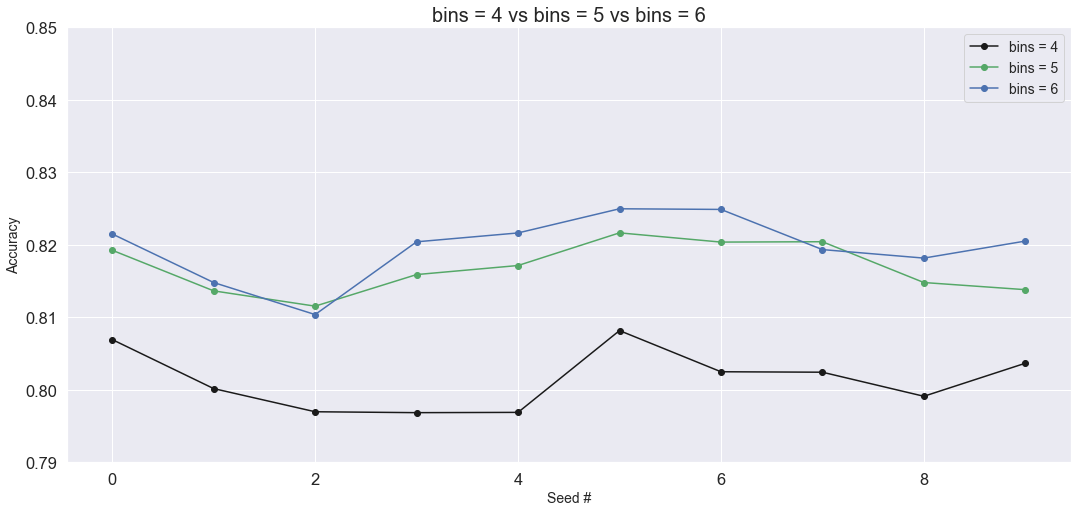

In [44]:
score_list = [score_b4, score_b5, score_b6]
for item in score_list:
    item = np.array(item*100)
# plot
fig = plt.figure(figsize= (18,8) )
ax = plt.gca()
ax.plot(range(seeds), score_b4,'-ok',label='bins = 4')
ax.plot(range(seeds), score_b5,'-og',label='bins = 5')
ax.plot(range(seeds), score_b6,'-ob',label='bins = 6')
ax.set_xlabel("Seed #", fontsize = '14')
ax.set_ylim(0.79,0.85)
ax.set_ylabel("Accuracy", fontsize = '14')
ax.set_title('bins = 4 vs bins = 5 vs bins = 6', fontsize='20')
plt.legend(fontsize = 14,loc='upper right')

In [45]:
b4, b5, b6 = ['Sex_Code','Pclass','Ti_Minor','FareBin4'], ['Sex_Code','Pclass','Ti_Minor','FareBin5'],\
                ['Sex_Code','Pclass','Ti_Minor','FareBin6']
b4_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20,oob_score=True)
b4_Model.fit(X[b4], Y)
b5_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20,oob_score=True)
b5_Model.fit(X[b5], Y)
b6_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20,oob_score=True)
b6_Model.fit(X[b6], Y)
print('b4 oob score :%.5f' %(b4_Model.oob_score_))
print('b5 oob score :%.5f '%(b5_Model.oob_score_))
print('b6 oob score : %.5f' %(b6_Model.oob_score_))

b4 oob score :0.82604
b5 oob score :0.81257 
b6 oob score : 0.81257


In [46]:
#kaggle:0.78468
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
b4_pred = b4_Model.predict(X_Submit[b4])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'], "Survived":b4_pred.astype(int)})
submit.to_csv("submit_b4.csv",index=False)

In [47]:
#kaggle:0.79904 
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
b5_pred = b5_Model.predict(X_Submit[b5])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'], "Survived":b5_pred.astype(int)})
submit.to_csv("submit_b5.csv",index=False)

In [48]:
#kaggle:0.77511 
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
b6_pred = b6_Model.predict(X_Submit[b6])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'], "Survived":b6_pred.astype(int)})
submit.to_csv("submit_b6.csv",index=False)

In [49]:
#ticket處理 問題：持有相同票那群人的關係

In [50]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [51]:
# Family_size
df_data['Family_size'] = df_data['SibSp'] + df_data['Parch'] + 1

In [52]:
#觀察相同票根，那些人的姓名、票價、艙位、家庭人數  
deplicate_ticket = []
for tk in df_data.Ticket.unique():
    tem = df_data.loc[df_data.Ticket == tk, 'Fare']
    #print(tem.count())
    if tem.count() > 1:
        #print(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare']])
        deplicate_ticket.append(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare','Cabin','Family_size','Survived']])
deplicate_ticket = pd.concat(deplicate_ticket)
deplicate_ticket.head(14)

,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
1125,"Cumings, Mr. John Bradley",PC 17599,71.2833,C85,2,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
1037,"Hilliard, Mr. Herbert Henry",17463,51.8625,E46,1,NaN
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


In [53]:
df_fri = deplicate_ticket.loc[(deplicate_ticket.Family_size == 1) & (deplicate_ticket.Survived.notnull())].head(7)
df_fami = deplicate_ticket.loc[(deplicate_ticket.Family_size > 1) & (deplicate_ticket.Survived.notnull())].head(7)
display(df_fri,df_fami)
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print('friends: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size == 1]))
print('families: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size > 1]))

,Name,Ticket,Fare,Cabin,Family_size,Survived
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
20,"Fynney, Mr. Joseph J",239865,26.0000,NaN,1,0.0
791,"Gaskell, Mr. Alfred",239865,26.0000,NaN,1,0.0
195,"Lurette, Miss. Elise",PC 17569,146.5208,B80,1,1.0
681,"Hassab, Mr. Hammad",PC 17572,76.7292,D49,1,1.0
61,"Icard, Miss. Amelie",113572,80.0000,B28,1,1.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",113572,80.0000,B28,1,1.0


,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


people keep the same ticket: 596 
friends: 127 
families: 469 


In [54]:
# the same ticket family or friends
df_data['Conn_Survival'] = 0.5 # default 
for _, df_grp in df_data.groupby('Ticket'):
    if (len(df_grp) > 1):
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Conn_Survival'] = 1
            elif (smin==0.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Conn_Survival'] = 0
#print
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print("people have connected information : %.0f" 
      %(df_data[df_data['Conn_Survival']!=0.5].shape[0]))
df_data.groupby('Conn_Survival')[['Survived']].mean().round(3)

people keep the same ticket: 596 
people have connected information : 496


,Survived
Conn_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


In [55]:
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [56]:
#kaggle:0.81818
connect = ['Sex_Code','Pclass','Ti_Minor','FareBin4','Conn_Survival']
connect_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20
                                       ,oob_score=True)
connect_Model.fit(X[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_))

connect oob score :0.84624


In [57]:
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
connect_pred = connect_Model.predict(X_Submit[connect])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],"Survived":connect_pred.astype(int)})
submit.to_csv("submit_conn_b4.csv",index=False)

In [58]:
#kaggle:0.82296
connect = ['Sex_Code','Pclass','Ti_Minor','FareBin5','Conn_Survival']
connect_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20
                                       ,oob_score=True)
connect_Model.fit(X[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_))

connect oob score :0.84287


In [59]:
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
connect_pred = connect_Model.predict(X_Submit[connect])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],"Survived":connect_pred.astype(int)})
submit.to_csv("submit_conn_b5.csv",index=False)

In [60]:
#kaggle:0.79904
connect = ['Sex_Code','Pclass','Ti_Minor','FareBin6','Conn_Survival']
connect_Model = RandomForestClassifier(random_state=42,n_estimators=250,min_samples_split=20
                                       ,oob_score=True)
connect_Model.fit(X[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_))

connect oob score :0.84175


In [61]:
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)
connect_pred = connect_Model.predict(X_Submit[connect])
submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],"Survived":connect_pred.astype(int)})
submit.to_csv("submit_conn_b6.csv",index=False)